# Apparent temperature Prediction using Weather variables

### Importing the packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mlt
%matplotlib inline

### Importing the dataset and displaying it

In [2]:
df=pd.read_csv('weather_data.csv')
pd.options.display.max_columns=None
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


### Displaying the shape of the dataset

In [3]:
df.shape

(5999, 12)

### Describing the dataset

In [4]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.0,5999.000000
mean,10.217695,8.958658,0.779488,10.007362,190.349558,9.476875,0.0,997.359828
std,10.565425,11.923712,0.173051,6.536619,107.026792,4.038583,0.0,145.173638
min,-14.088889,-22.094444,0.270000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1.094444,-1.538889,0.680000,4.878300,122.000000,6.906900,0.0,1012.060000
50%,10.050000,10.050000,0.830000,9.064300,190.000000,9.982000,0.0,1016.840000
75%,18.722222,18.722222,0.920000,13.395200,287.000000,11.270000,0.0,1022.490000
max,34.005556,36.400000,1.000000,45.933300,359.000000,16.100000,0.0,1045.140000


### Checking for the null values in the dataset

In [5]:
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

### Dropping the Column that has 0 value 

In [6]:
df=df.drop('Loud Cover',axis=1)

In [7]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258,14.9569,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259,9.9820,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260,9.9820,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259,9.9820,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279,9.9820,1017.22,Partly cloudy throughout the day.


# Exploratory Data Analysis

The aim of this report is to predict the apparent temperature based on various parameters. Our main objective here is to define a report consisting of Data Visualisation using various libraries like Seaborn and Matplotlib.

Here, we will visualise and predict the apparent temperature using the test data.

Here, we will find the relationship between humidity and temperature and humidity and apparent temperature.
We will predict the apparent temperature given the humidity in this project.

Apparent temperature is the temperature that it feels like to our body because of other weather variables other than temperature.This is generally higher incase of high humidity.


## Data Description

The data set contains 6000 entries with 12 columns listing various environment variables and text descriptions

The CSV file includes a hourly/daily summary for Szeged, Hungary area, between 2006 and 2008

Data available in the hourly response:
time,
summary,
precipType,
temperature,
apparentTemperature,
humidity,
windSpeed,
windBearing,
visibility,
loudCover,
pressure

## Univariate Analysis

'Uni' stands for One. This means that the analysis is done considering one variable. This is the simplest method of analysis. Univariate analysis is used to describe the data and observe the pattern. Hence, it is also helpful during the bivariate or multivariate analysis.

### Humidity- Histogram

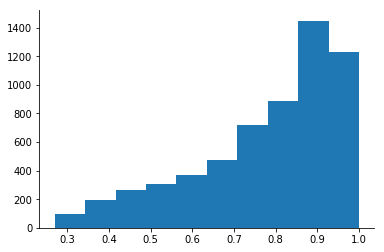

In [8]:
mlt.hist(x ='Humidity', data = df)
sns.despine()

Here, we can observe that:

1.The above data is continuous in nature.

2.There are many outliers present in the above graph.

3.The Humidity is Increasing continously after 0.9 it goes down

4.Between 0.8-0.9 there is highest Humidity 

### Temperature(C)- Kernel density estimation

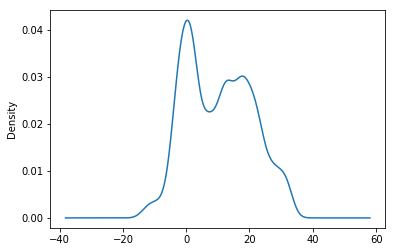

In [9]:
df['Temperature (C)'].plot(kind="kde")

### Summary -Count Plot

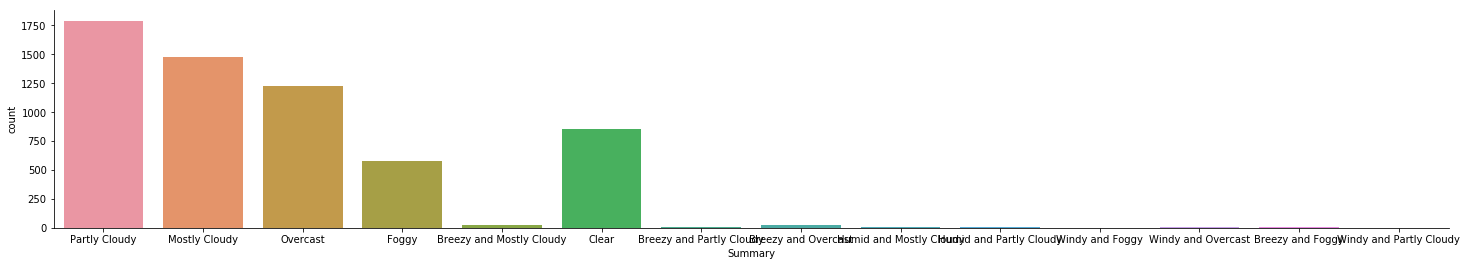

In [10]:
mlt.figure(figsize=(25,4))
sns.countplot(x  = 'Summary',data=df)
sns.despine()

Here, we observe that:

1.Partly Cloudy occurs for the maximum number of times around 1750

2.Breezy and Mostly Cloudy occurs for the minimum number of times nearly between 0-250

### Temperature (c)- Distribution plot

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


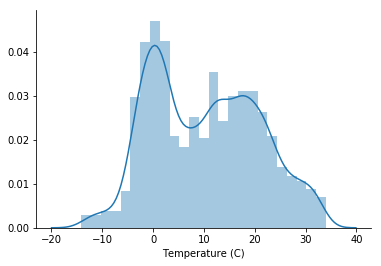

In [11]:
sns.distplot(df['Temperature (C)'])
sns.despine()

From the above distribution plot, we can observe:

1.The above data is continuous in nature.

2.There are many outliers present in the above graph.

3.The above plot is skewed.

### Precip Type- Count Plot 

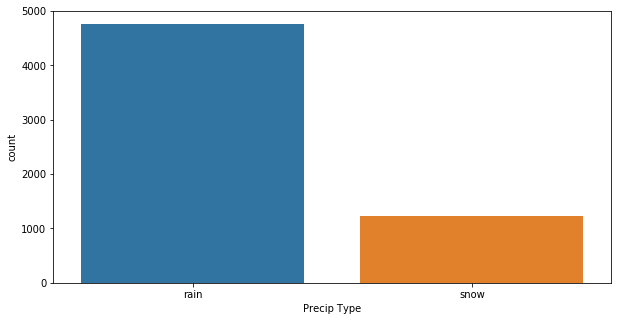

In [12]:
mlt.figure(figsize = (10,5))
sns.countplot(x = 'Precip Type', data= df)

From the above Count plot, we can observe:

1.The above graph has two categories of Precip type i.e. Rain,snow

2.Rain occurs much number of times than snow.

### Humidity- Distribution plot 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


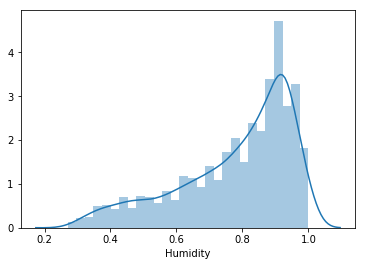

In [13]:
sns.distplot(df.Humidity)

From the above distribution plot, we can observe:

1.The above data is continuous in nature.

2.There are many outliers present in the above graph.

3.The above plot is skewed.

4.Humidity is highest at 0.9 

### Apparent Temperature (C)- Distribution Plot

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


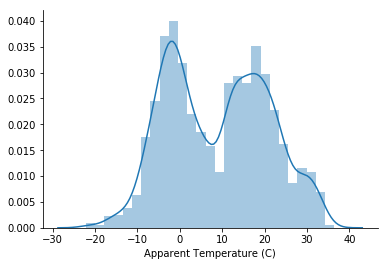

In [14]:
sns.distplot(df['Apparent Temperature (C)'])
sns.despine()

From the above distribution plot, we can observe:

1.The above data is continuous in nature.

2.There are many outliers present in the above graph.

3.The above plot is skewed.

4.Apparent Temperature is highest between -10 and 0 

### Humidity- barplot

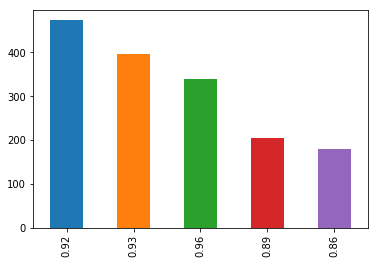

In [15]:
df['Humidity'].value_counts().head(5).plot.bar()

Here, We observe that:

1.Humidity is highest at 0.92

## Bivariate Graph

'Bi' stands for Twp. This means that the analysis is done considering two variables. It is the simultaneous analysis of two variables. It tells us about the dependencies, association and relation between these two specific variables. After analysing their relation, we can infer the level of their dependencies on each other.

We will now analyse the co-relation between all the considered parameters.

In [16]:
df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992881,-0.564260,-0.053935,0.044263,0.432098,-0.080315
Apparent Temperature (C),0.992881,1.000000,-0.535399,-0.126701,0.055151,0.422888,-0.077491
Humidity,-0.564260,-0.535399,1.000000,-0.209529,0.041205,-0.343168,0.061836
Wind Speed (km/h),-0.053935,-0.126701,-0.209529,1.000000,-0.068218,0.078624,-0.043172
Wind Bearing (degrees),0.044263,0.055151,0.041205,-0.068218,1.000000,0.016963,-0.052019
Visibility (km),0.432098,0.422888,-0.343168,0.078624,0.016963,1.000000,-0.038036
Pressure (millibars),-0.080315,-0.077491,0.061836,-0.043172,-0.052019,-0.038036,1.000000


We use heatmap to plot the relation between the various parameters. The positive values show direct relation whereas the negative values represent opposite or indirect relation.

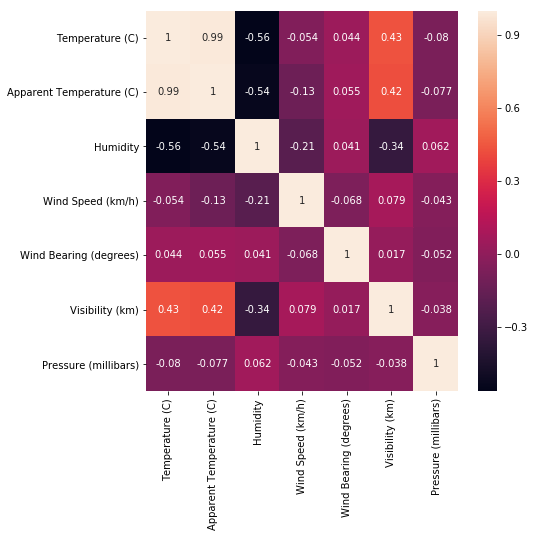

In [17]:
mlt.figure(figsize  =(7,7))
sns.heatmap(df.corr(),annot=True)
mlt.show()

### Temperature (C) vs Humidity - Regression Plot

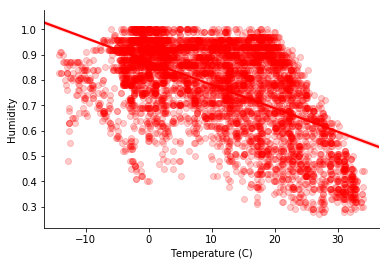

In [18]:
sns.regplot(x = 'Temperature (C)',y = 'Humidity',data = df, x_jitter=0.2, scatter_kws={'alpha':0.2},color='red')
sns.despine()

Here, We observe:

1. Temperature and Humidity has a direct relation.

2. When the Temperature increases Humidity decreases.

### Apparent Temperature (C) vs Pressure (millibars) - Regression Plot

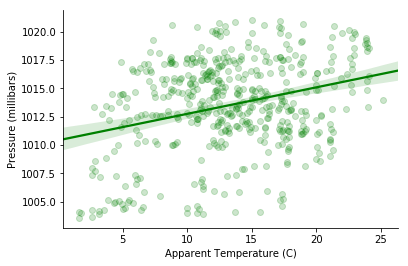

In [35]:
sns.regplot(x = 'Apparent Temperature (C)',y = 'Pressure (millibars)',data = df, x_jitter=0.2, scatter_kws={'alpha':0.2},color='g')
sns.despine()

From the above distribution plot we observe that:

1.Pressure and Apparent Temperture has a direct Relation.

2.When Pressure increases as the Apparent Temperture increases.

### Apparent Temperature (C) vs Humidity - Regression Plot

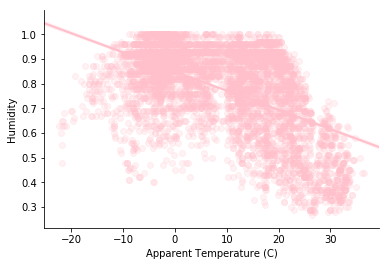

In [20]:
sns.regplot(x = 'Apparent Temperature (C)',y = 'Humidity',data = df, x_jitter=0.2, scatter_kws={'alpha':0.2},color='pink')
sns.despine()

Here, We observe:

1. Apparent Temperature and Humidity has an inverse relation.

2. When the Apparent Temperature increases Humidity decreases.

### Apparent Temperature(C) vs Wind Speed (km/h)-Regression plot

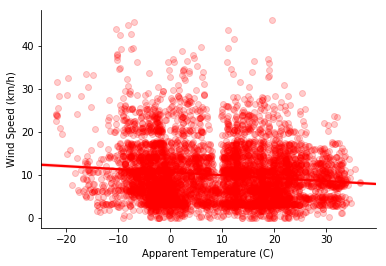

In [21]:
sns.regplot(x = 'Apparent Temperature (C)', y = 'Wind Speed (km/h)',data = df, x_jitter=0.2, scatter_kws={'alpha':0.2},color='red')
sns.despine()

Here, we can observe that:

1.The Highest Apparent Temperature has the lowest Wind Speed

2.Apparent Temperature and Wind Speed has an indirect Relation between them.

3.The above distribution shows that when the apparent temperature increases as the Wind Speed decreases.

### Humidity vs Apparent Temperature(C)-Regression plot

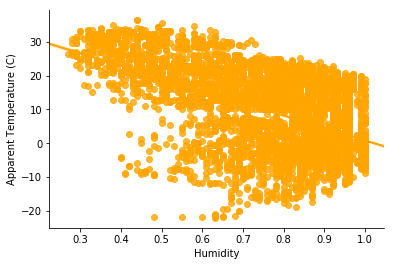

In [22]:
sns.regplot(x = 'Humidity',y = 'Apparent Temperature (C)',data = df ,color='orange')
sns.despine()

Here, we can observe that:

1.This distribution show that Humidity and Apparent Temperature has an inverse realation.

2.As the Humidity increases the Apparent temperature decreases.

## Multivariate Analysis

'Multi' stands for Many. This means that the analysis is done considering more than two variables. It is the simultaneous analysis of many variables. It tells us about the dependencies, association and relation between the variables. After analysing their relation, we can infer the level of their dependencies on each other.

Our main aim of this analysis is to predict the apparent temperature. Hence, we will analyse parameters with respect to apparent temperature here.

## Temperature (C) vs  in Apparent Temperature (C) terms of Humidity- Facet grid

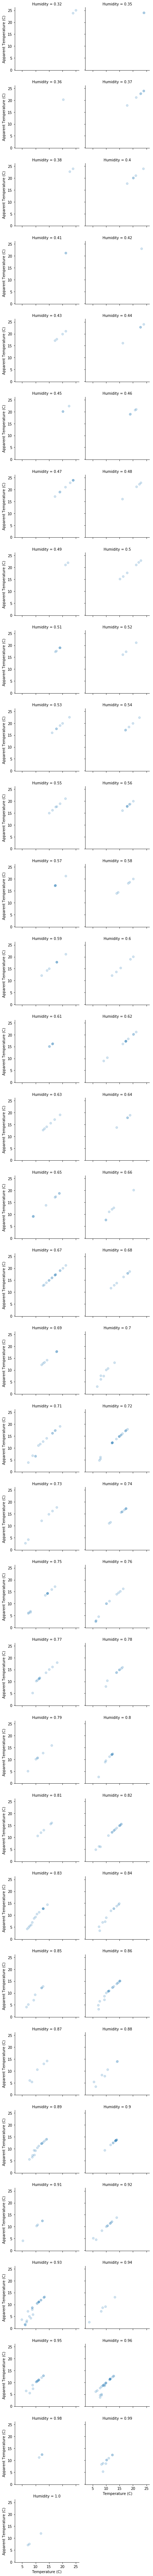

In [23]:
df=df.head(500)
grid=sns.FacetGrid(df, col='Humidity',col_wrap=2)
grid.map(mlt.scatter,'Temperature (C)','Apparent Temperature (C)',alpha = 0.2)
sns.despine()

Here, We can say that:

1.Apparent Temperature and Temperature at highest at when the Humidity is lowest i.e. on 0.36 and 0.37

2.Apparent Temperature and Temperature at lowest at when the Humidity is highest i.e. on 0.96 and 0.99

### Pair Plot

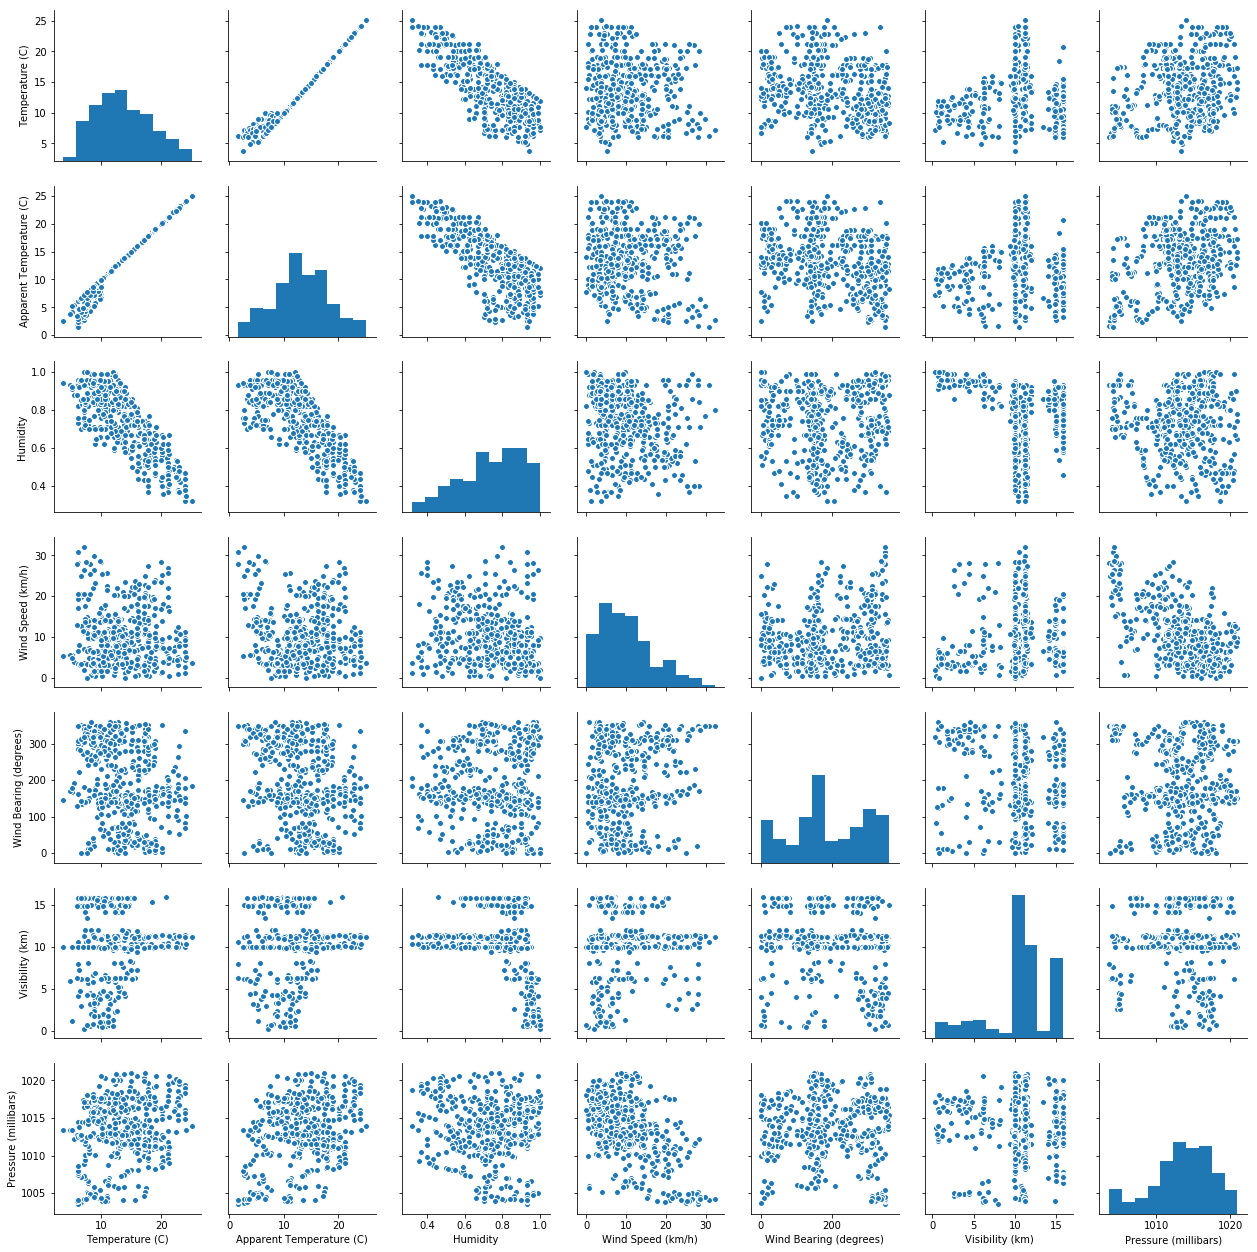

In [24]:
sns.pairplot(df)

## Feature Engineering

Feature engineering means building additional features out of existing data which is often spread across multiple related tables. Feature engineering requires extracting the relevant information from the data and getting it into a single table which can then be used to train a machine learning model.

In [25]:
new = df.drop(['Visibility (km)','Pressure (millibars)','Wind Bearing (degrees)','Wind Speed (km/h)','Formatted Date','Precip Type','Summary','Daily Summary'],axis =1)
new

,Temperature (C),Apparent Temperature (C),Humidity
0,9.472222,7.388889,0.89
1,9.355556,7.227778,0.86
2,9.377778,9.377778,0.89
3,8.288889,5.944444,0.83
4,8.755556,6.977778,0.83
5,9.222222,7.111111,0.85
6,7.733333,5.522222,0.95
7,8.772222,6.527778,0.89
8,10.822222,10.822222,0.82
9,13.772222,13.772222,0.72


In [26]:
pd.options.display.max_columns = None
df1 = pd.get_dummies(new)
df1

,Temperature (C),Apparent Temperature (C),Humidity
0,9.472222,7.388889,0.89
1,9.355556,7.227778,0.86
2,9.377778,9.377778,0.89
3,8.288889,5.944444,0.83
4,8.755556,6.977778,0.83
5,9.222222,7.111111,0.85
6,7.733333,5.522222,0.95
7,8.772222,6.527778,0.89
8,10.822222,10.822222,0.82
9,13.772222,13.772222,0.72


### Finding P-Values for every colmun

A p-value is the probability of rejecting a null-hypothesis when the hypothesis is proven true. The null hypothesis is a statement that says that there is no difference between two measures. If the p-value is equal to or less than the significance level (α), then the null hypothesis is inconsistent and it needs to be rejected

In [27]:
import itertools
from scipy.stats import pearsonr
correlations = {}
columns = df1.columns.tolist()

for col_a, col_b in itertools.combinations(columns, 2):
    correlations[col_a + ' --- ' + col_b] = pearsonr(df1.loc[:, col_a], df1.loc[:, col_b])

result = df1.from_dict(correlations, orient='index')
result.columns = ['PCC', 'P-Value']
pd.options.display.max_rows = None
print(result.sort_index().head(20))

                                                   PCC        P-Value
Apparent Temperature (C) --- Humidity        -0.736619   1.251019e-86
Temperature (C) --- Apparent Temperature (C)  0.987101   0.000000e+00
Temperature (C) --- Humidity                 -0.779479  3.181352e-103


In [28]:
# importing the required libraries for regression
from sklearn.preprocessing import *
from sklearn.linear_model import LinearRegression
from sklearn.tree import *
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import *
from sklearn.metrics import *

Defining the data and the target for building a regression model.

In [29]:
title = df1['Humidity']
train = df1.drop(['Humidity', 'Temperature (C)'],axis=1)

Splitting the dataset into test and train variables with training size as 0.30

In [30]:
x_train , x_test , y_train , y_test = train_test_split(train , title , train_size = 0.3,random_state=27)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Linear Regression

In statistics, linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression.

In [31]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
reg.score(x_test,y_test)

0.5683315653929002

### Random Forest Regressor

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

In [33]:
clf = RandomForestRegressor(n_estimators=100,n_jobs=2,random_state=15)
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
clf.score(x_test,y_test)

0.6060261261425507

### Gradient Boosting Regressor

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [34]:
gbr = GradientBoostingRegressor(n_estimators=20)
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
gbr.score(x_test,y_test)

0.6656326596458304

## Summary

From the above plots, we conclude that there are various parameters involved in determining Apparent Temperature. Like:

1. Apparent Temperature and Humidity has an inverse relation. When the Apparent Temperature increases Humidity decreases.
2. Apparent Temperature and Temperature at lowest at when the Humidity is highest i.e. on 0.96 and 0.99
3. Apparent Temperature and Temperature at highest at when the Humidity is lowest i.e. on 0.36 and 0.37
4. Apparent Temperature and Wind Speed has an indirect Relation between them.
5. Pressure and Apparent Temperture has a direct Relation. When Pressure increases as the Apparent Temperture increases.

We did exploratory data analysis on the dataset to see the visualisations and the dependencies of the features on one another.

We even performed feature engineering to extract the meaningful data out of the dataset given.

Then we applied three models on the dataset to find the best model to define the dataset.


## Conclusion

We applied three models on our dataset- Linear Regressor, Gradient Boosting Regressor and Random Forest Regressor.

The accuracies were:

Linear Regressor- 0.5683

Gradient Boosting Regressor- 0.6060

Random Forest Regressor- 0.6656

The random forest regressor gave us the best results with the accuracy of 0.6656.

So, we know that now the random forest regressor fits best for our dataset and gives us the best results.